In [100]:
# 주식 데이터 수집 라이브러리 설치
#!pip install -U finance-datareader

## FinanceDataReader
* 금융 데이터 수집을 위한 라이브러리
* FinanceDataReader를 이용하여 수집할 수 있는 데이터
  * 거래소 별 상장종목 목록
  * 국내외 주식 데이터 : 국내주식, 미국주식 및 기타 글로벌 종목
  * 국내외 주가 지수 : KOSPI, KOSDAQ, S&P 500, NASDAQ, DOW,니케이225, 항셍 지수 등 글로벌 주요 지수
  * 상품선물 : 천연가스 선물, 금 선물, 은 선물, 구리 선물, WTI유 선물
  * 환율 : 달러당 원화 환율, 달러달 유로화 환율, 달러당 루블화 환율 등
  * 채권 수익률 : 1/3/5/10년 만기 한국 국채 수익률, 1/3/5/10년 만기 미국 국채 수익률
  * 암호화폐 가격 : 비트코인 원화/달러 가격, 이더리움 원화/달러 가격, 리플 원화/달러 가격 등
* 사용하는 함수는 아래 두가지이며, 분석할 데이터를 불러오는 데 사용하는 함수는 DataReader 한가지이다.
  * **`DataReader(symbol, startdate, enddate)`**
    * symbol : 수집 대상 코드
    * startdate : 수집 시작 날짜
    * enddate : 수집 종료 날짜
  * **`StockListing(market)`**
    * 거래소 별 상장 종목 목록을 가져오는 함수

* 데이터 제공 형식
  * 일별 데이터: 시가, 고가, 저가, 종가, 거래량
  * 시계열 데이터: DateTime 인덱스


* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

## 라이브러리 import

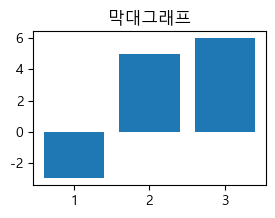

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

# matplotlib 한글폰트 지정
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 한글폰트 테스트
plt.figure(figsize=(3,2))
plt.bar([1,2,3],[-3,5,6])
plt.title('막대그래프')
plt.show()

## 마켓별 상장 종목 정보 수집
* **`fdr.StockListing(마켓코드)`**
* 마켓코드
    * 한국시장
      * `'KRX'` : 한국거래소 전체 상장 기업 목록 (KOSPI+KOSDAQ+KONEX)
      * `'KOSPI'` : 코스피 상장 기업 목록만
      * `'KOSDAQ'` : 코스닥 상장 기업 목록만
      * `'KONEX'` : 코넥스 상장 기업 목록만
      * `'KRX-DELISTING'` : 한국거래소에서 상장폐지된 종목 리스트
    * 해외시장
      * `'NYSE'` : 뉴욕증권거래소 상장 기업 목록
      * `'NASDAQ'` : 나스닥 상장 기업 목록
      * `'AMEX'` : AMEX 종목 상장 기업 목록
      * `'S&P500'` : S&P500 지수 구성 종목 목록
      * `'SSE'` : 상하이 거래소(Shanghai Stock Exchange)
      * `'SZSE'` : 선전거래소(Shenzhen Stock Exchange)
      * `'HKEX'` : 홍콩 거래소(Hong Kong Stock Exchange)
      * `'TSE'` : 도쿄 거래소(Tokyo Stock Exchange)
      * `'HOSE'` : 호찌민 거래소(Ho Chi Minh Stock Exchange)
      
  
* 컬럼정보
    * `Close` : 최종일 기준 종가
    * `Volume`: 최종일 기준 거래량
    * `Amount`: 최종일 기준 거래금액
    * `Stocks`: 상장주식수
    * `Marcap`: 시가총액
* 마켓에 따라 제공되는 정보(컬럼)이 다르다.


In [102]:
fdr.StockListing('KRX').head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,54700,1,500,0.92,53900,55000,53700,10901337,592151080050,323804194333400,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,203000,1,3000,1.50,200000,203500,196900,1459997,292677967900,147784480095000,728002365,STK
2,207940,KR7207940008,삼성바이오로직스,KOSPI,,1043000,1,27000,2.66,1030000,1043000,1013000,95760,97927833500,74234482000000,71174000,STK
3,373220,KR7373220003,LG에너지솔루션,KOSPI,,278000,1,10000,3.73,268500,280000,268500,205921,56991582750,65052000000000,234000000,STK
4,105560,KR7105560007,KB금융,KOSPI,,102000,1,3000,3.03,100000,102000,99200,1282596,129360497656,40139899146000,393528423,STK


## 특정 종목에 대한 가격 데이터 수집
* **`fdr.DataReader(코드)`** 
* 일별 데이터 제공
* 날짜가 인덱스로 지정됨
* 수집할 수 있는 데이터 종류
  * 국내주식: '**`005930`**'(삼성전자), '**`091990`**'(셀트리온헬스케어) 등 주식 종목 코드를 이용하여 수집<br>
  * 해외주식: '**`AAPL`**'(애플), '**`AMZN`**'(아마존) 등 주식 종목 코드를 이용하여 수집 <br>
  * 각종 지수
    * 한국 지수
      * '**`KS11`**': 코스피 지수
      * '**`KQ11`**': 코스닥 지수
      * '**`KS200`**': KOSPI 200 지수
    * 미국 지수
      * '**`DJI`**': 다우존스 산업평균지수
      * '**`IXIC`**': 나스닥 종합지수
      * '**`US500`**': S&P 500 지수
      * '**`RUT`**': 러셀 2000 지수
      * '**`VIX`**': 변동성 지수
    * 글로벌 지수
      * '**`SSEC`**': 상해 종합지수
      * '**`HSI`**': 홍콩 항셍지수
      * '**`N225`**': 일본 닛케이225 지수
      * '**`FTSE`**': 영국 FTSE 100 지수
      * '**`FCHI`**': 프랑스 CAC 40 지수
      * '**`GDAXI`**': 독일 DAX 지수
<br>
  * 환율
    * 달러 기준 환율
      * '**`USD/KRW`**': 달러당 원화 환율
      * '**`USD/EUR`**': 달러당 유로화 환율
      * '**`USD/JPY`**': 달러당 엔화 환율
      * '**`USD/CNY`**': 달러당 위엔화 환율
      * '**`USD/RUB`**': 달러당 루블화 환율
    * 기타 통화 환율
      * '**`CNY/KRW`**': 위엔화 원화 환율
      * '**`EUR/USD`**': 유로화 달러 환율
      * '**`JPY/KRW`**': 엔화 원화 환율
      * '**`AUD/USD`**': 호주 달러 환율
      * '**`EUR/JPY`**': 유로화 엔화 환율
      * '**`EUR/CNY`**': 유로화 위엔화 환율
  <br>
  * 채권
    * 한국 국채 수익률
      * '**`KR1YT=RR`**': 1년만기 한국국채
      * '**`KR2YT=RR`**': 2년만기 한국국채
      * '**`KR3YT=RR`**': 3년만기 한국국채
      * '**`KR4YT=RR`**': 4년만기 한국국채
      * '**`KR5YT=RR`**': 5년만기 한국국채
      * '**`KR10YT=RR`**': 10년만기 한국국채
      * '**`KR20YT=RR`**': 20년만기 한국국채
      * '**`KR30YT=RR`**': 30년만기 한국국채
      * '**`KR50YT=RR`**': 50년만기 한국국채8
    * 미국 국채 수익률
      * 단기 국채
        * '**`US1MT=X`**': 1개월만기 미국국채
        * '**`US3MT=X`**': 3개월만기 미국국채
        * '**`US6MT=X`**': 6개월만기 미국국채
      * 장기 국채
        * '**`US1YT=X`**': 1년만기 미국국채
        * '**`US2YT=X`**': 2년만기 미국국채
        * '**`US3YT=X`**': 3년만기 미국국채
        * '**`US5YT=X`**': 5년만기 미국국채
        * '**`US7YT=X`**': 7년만기 미국국채
        * '**`US10YT=X`**': 10년만기 미국국채
        * '**`US30YT=X`**': 30년만기 미국국채
  * 선물
    * 에너지 선물
      * '**`CL=F`**': WTI유 선물 (NYMEX)
      * '**`BZ=F`**': 브렌트유 선물 (NYMEX)
      * '**`NG=F`**': 천연가스 선물 (NYMEX)
    * 금속 선물
      * '**`GC=F`**': 금 선물 (COMEX)
      * '**`SI=F`**': 은 선물 (COMEX)
      * '**`HG=F`**': 구리 선물 (COMEX)
  * 암호화폐
    * 원화(KRW) 거래 가능
      * '**`BTC/KRW`**':비트코인
      * '**`ETH/KRW`**':이더리움
      * '**`XRP/KRW`**':리플
      * '**`BCH/KRW`**':비트코인 캐시
      * '**`USDT/KRW`**':테더
      * '**`BNB/KRW`**':바이낸스 코인
      * '**`USDC/KRW`**':USD 코인
      * '**`ADA/KRW`**':카르다노
      * '**`SOL/KRW`**':솔라나
      * '**`DOGE/KRW`**':도지코인
    * 달러(USD) 거래 가능
      * '**`BTC/USD`**':비트코인
      * '**`ETH/USD`**':이더리움
      * '**`EOS/USD`**':이오스

##  개별 종목 데이터 수집
* `fdr.DataReader(종목코드)`

In [103]:
# ----------------------------
# 삼성전자 전체 데이터 수집
#   df_005930
# ----------------------------
fdr.DataReader('KRX:005930')


,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,Shares
Date,,,,,,,,,,,
1995-05-02,120536,120536,118046,119042,139560,-0.0083,2,-996,16676735000,6497053077500,54368645
1995-05-03,119042,126015,119042,123027,382980,0.0335,1,3985,47649710000,6714527657500,54368645
1995-05-04,123525,124023,121533,122031,175590,-0.0081,2,-996,21609210000,6660159012500,54368645
1995-05-06,121533,123027,121533,121533,47440,-0.0041,2,-498,5810535000,6632974690000,54368645
1995-05-08,121533,121533,120038,120536,91810,-0.0082,2,-997,11127115000,6578606045000,54368645
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-20,56200,56700,55700,55900,9080577,0.0018,1,100,509071853300,330907759839800,5919637922
2025-05-21,56200,56600,55700,55700,7794181,-0.0036,2,-200,436952856950,329723832255400,5919637922
2025-05-22,55300,55500,54500,54700,15254278,-0.0180,2,-1000,836539466150,323804194333400,5919637922


In [104]:
# info
samsung = fdr.DataReader('KRX:005930')
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7585 entries, 1995-05-02 to 2025-05-26
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7585 non-null   int64  
 1   High    7585 non-null   int64  
 2   Low     7585 non-null   int64  
 3   Close   7585 non-null   int64  
 4   Volume  7585 non-null   int64  
 5   Change  7585 non-null   float64
 6   UpDown  7585 non-null   int64  
 7   Comp    7585 non-null   int64  
 8   Amount  7585 non-null   int64  
 9   MarCap  7585 non-null   int64  
 10  Shares  7585 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 711.1 KB


In [105]:
samsung.index = pd.to_datetime(samsung.index)
samsung.index

DatetimeIndex(['1995-05-02', '1995-05-03', '1995-05-04', '1995-05-06',
               '1995-05-08', '1995-05-09', '1995-05-10', '1995-05-11',
               '1995-05-12', '1995-05-13',
               ...
               '2025-05-13', '2025-05-14', '2025-05-15', '2025-05-16',
               '2025-05-19', '2025-05-20', '2025-05-21', '2025-05-22',
               '2025-05-23', '2025-05-26'],
              dtype='datetime64[ns]', name='Date', length=7585, freq=None)

## 여러종목 종가(Close)를 한번에 수집
* `fdr.DataReader('종목코드,종목코드,...')`
    * 종목코드를 따옴표로 묶어서 한번에 전달


In [106]:
# -------------------------------------------
# 삼성전자(005930), SK하이닉스(000660)의 종가
#    df_005930_000660
# -------------------------------------------
several = fdr.DataReader(['005930', '000660'])
several


sam = fdr.DataReader('KRX:005930')
hi = fdr.DataReader('KRX:000660')
several = pd.concat([sam['Close'], hi['Close']], axis=1)
several.head()

,Close,Close
Date,,
1995-05-02,119042,NaN
1995-05-03,123027,NaN
1995-05-04,122031,NaN
1995-05-06,121533,NaN
1995-05-08,120536,NaN


In [107]:
several.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7585 entries, 1995-05-02 to 2025-05-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   7585 non-null   int64  
 1   Close   7097 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 177.8 KB


## 기간에 따른 주가 변동 그래프

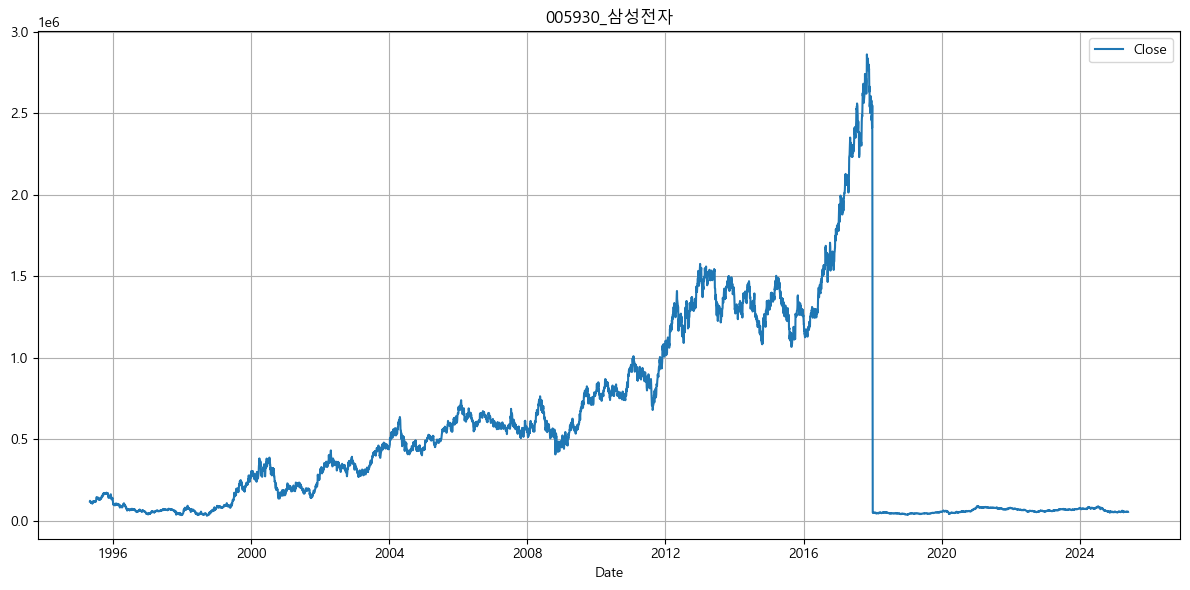

In [108]:
# --------------------------------
# 전체 기간 Close 시각화
# --------------------------------
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(samsung['Close'], label='Close')
plt.title('005930_삼성전자')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

             Open   High    Low  Close    Volume  Change  UpDown  Comp  \
Date                                                                     
2024-01-02  78200  79800  78200  79600  17142847  0.0140       1  1100   
2024-01-03  78500  78800  77000  77000  21753644 -0.0327       2 -2600   
2024-01-04  76100  77300  76100  76600  15324439 -0.0052       2  -400   
2024-01-05  76700  77100  76400  76600  11304316  0.0000       3     0   
2024-01-08  77000  77500  76400  76500  11088724 -0.0013       2  -100   
...           ...    ...    ...    ...       ...     ...     ...   ...   
2024-12-23  53400  54000  53300  53500  13672650  0.0094       1   500   
2024-12-24  53700  54500  53600  54400  11634677  0.0168       1   900   
2024-12-26  54500  54600  53500  53600  10517075 -0.0147       2  -800   
2024-12-27  53500  54100  53200  53700  10747196  0.0019       1   100   
2024-12-30  53300  54000  53100  53200  12624702 -0.0093       2  -500   

                   Amount           M

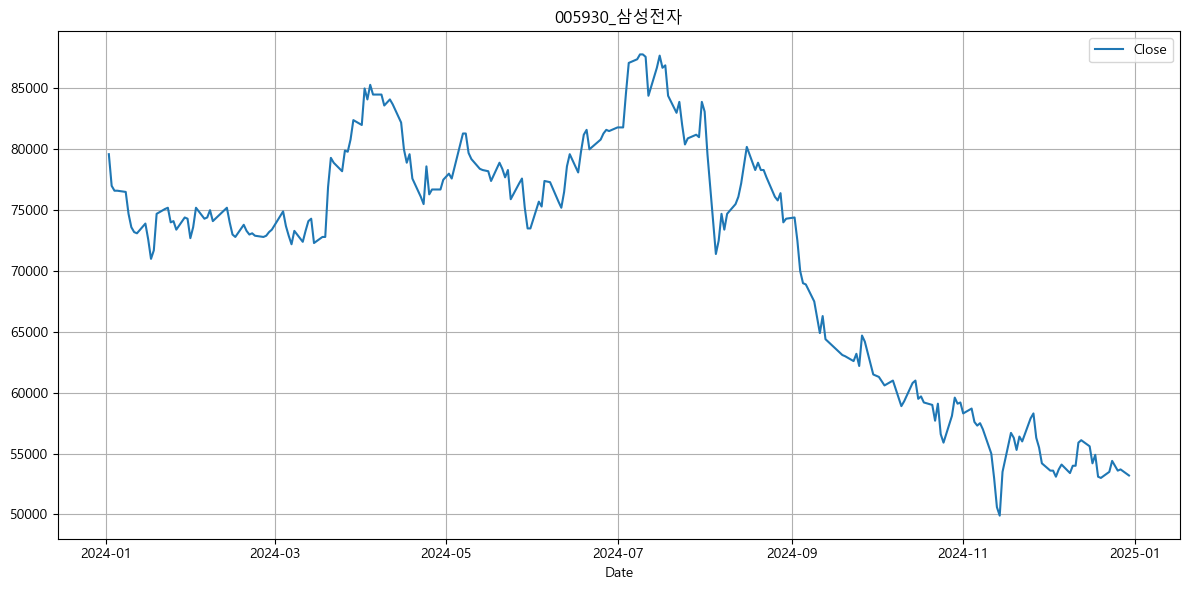

In [109]:
# --------------------------------
# 2024년 Close 시각화
# --------------------------------

samsung_2024 = samsung.loc['2024']
print(samsung_2024)


plt.figure(figsize=(12, 6))
plt.plot(samsung_2024['Close'], label='Close')
plt.title('005930_삼성전자')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

             Open   High    Low  Close    Volume  Change  UpDown  Comp  \
Date                                                                     
2020-01-02  55500  56000  55000  55200  12993228 -0.0108       2  -600   
2020-01-03  56000  56600  54900  55500  15422255  0.0054       1   300   
2020-01-06  54900  55600  54600  55500  10278951  0.0000       3     0   
2020-01-07  55700  56400  55600  55800  10009778  0.0054       1   300   
2020-01-08  56200  57400  55900  56800  23501171  0.0179       1  1000   
...           ...    ...    ...    ...       ...     ...     ...   ...   
2025-05-20  56200  56700  55700  55900   9080577  0.0018       1   100   
2025-05-21  56200  56600  55700  55700   7794181 -0.0036       2  -200   
2025-05-22  55300  55500  54500  54700  15254278 -0.0180       2 -1000   
2025-05-23  55000  55200  54100  54200  11247115 -0.0091       2  -500   
2025-05-26  53900  55000  53700  54700  10901337  0.0092       1   500   

                   Amount           M

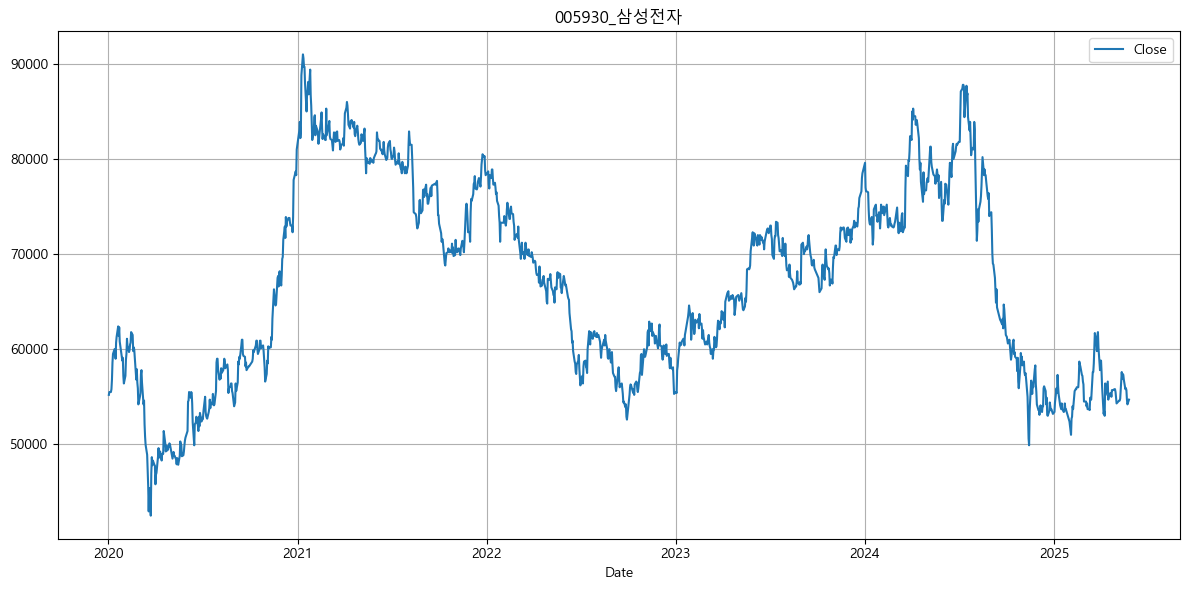

In [110]:
# --------------------------------
# 2020년~현재 Close 시각화
# --------------------------------

samsung_s2020 = samsung.loc['2020':]


print(samsung_s2020)


plt.figure(figsize=(12, 6))
plt.plot(samsung_s2020['Close'], label='Close')
plt.title('005930_삼성전자')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

             Open   High    Low  Close    Volume  Change  UpDown  Comp  \
Date                                                                     
2024-05-27  75300  78200  74000  77200  43825202  0.0171       1  1300   
2024-05-28  76500  78000  76200  77600  18539072  0.0052       1   400   
2024-05-29  77700  78200  75200  75200  30244875 -0.0309       2 -2400   
2024-05-30  74800  75200  73500  73500  28551273 -0.0226       2 -1700   
2024-05-31  74500  74700  73500  73500  26198776  0.0000       3     0   
...           ...    ...    ...    ...       ...     ...     ...   ...   
2025-05-20  56200  56700  55700  55900   9080577  0.0018       1   100   
2025-05-21  56200  56600  55700  55700   7794181 -0.0036       2  -200   
2025-05-22  55300  55500  54500  54700  15254278 -0.0180       2 -1000   
2025-05-23  55000  55200  54100  54200  11247115 -0.0091       2  -500   
2025-05-26  53900  55000  53700  54700  10901337  0.0092       1   500   

                   Amount           M

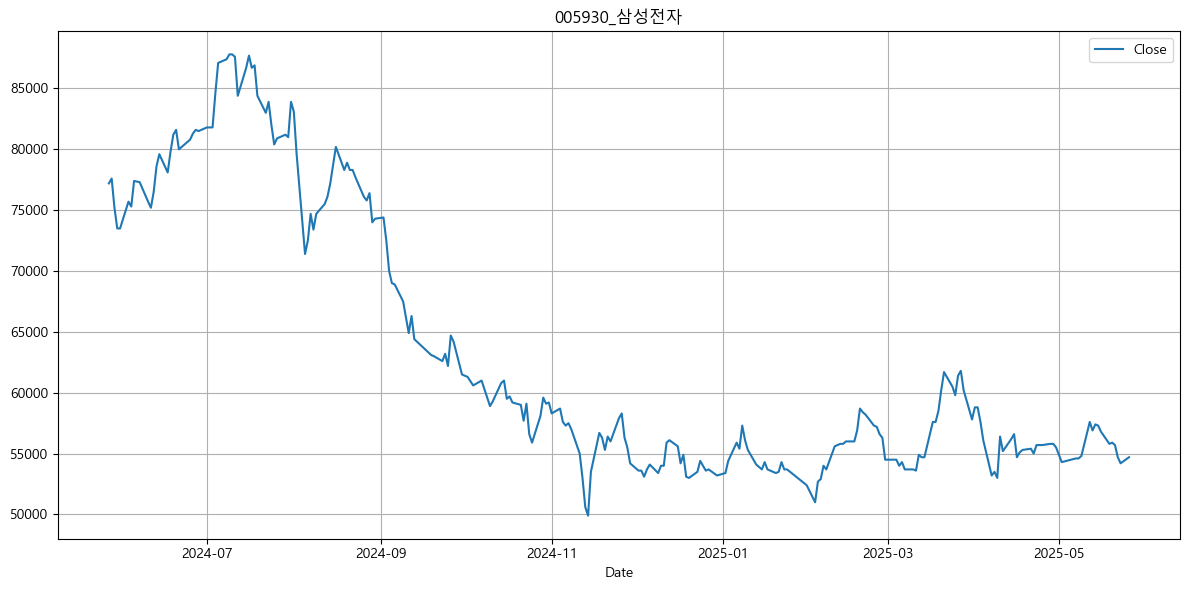

In [111]:
# --------------------------------
# 최근 1년 시각화
# --------------------------------
from datetime import datetime, timedelta
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

samsung_recent = samsung.loc[start_date:end_date]
print(samsung_recent)


plt.figure(figsize=(12, 6))
plt.plot(samsung_recent['Close'], label='Close')
plt.title('005930_삼성전자')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 상관관계

- 삼성전자, 하이닉스 상관관계

            005930  000660
Date                      
2013-03-08   29980   28250
2013-03-11   30160   28600
2013-03-12   29880   28100
2013-03-13   30540   28300
2013-03-14   30400   28900
...            ...     ...
2025-05-20   55900  202000
2025-05-21   55700  200500
2025-05-22   54700  196900
2025-05-23   54200  200000
2025-05-26   54700  203000

[3000 rows x 2 columns]


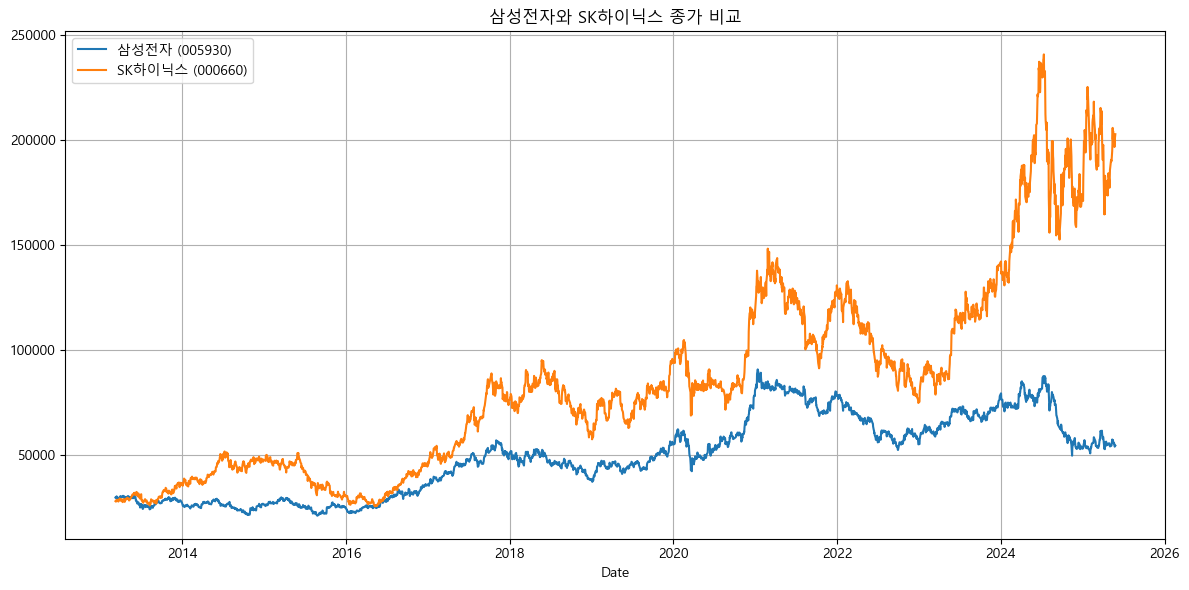

In [113]:
# ----------------------
# 전체 기간 시각화
# ----------------------
samhi = fdr.DataReader(['005930', '000660'])
print(samhi)

plt.figure(figsize=(12, 6))
plt.plot(samhi['005930'], label='삼성전자 (005930)')
plt.plot(samhi['000660'], label='SK하이닉스 (000660)')
plt.title('삼성전자와 SK하이닉스 종가 비교')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ----------------------
# 전체 기간 상관관계
# ----------------------

correlation = samhi.corr()
correlation

,005930,000660
005930,1.000000,0.818481
000660,0.818481,1.000000


            005930  000660
Date                      
2024-05-27   77200  201500
2024-05-28   77600  202500
2024-05-29   75200  202500
2024-05-30   73500  195700
2024-05-31   73500  189200
...            ...     ...
2025-05-20   55900  202000
2025-05-21   55700  200500
2025-05-22   54700  196900
2025-05-23   54200  200000
2025-05-26   54700  203000

[242 rows x 2 columns]


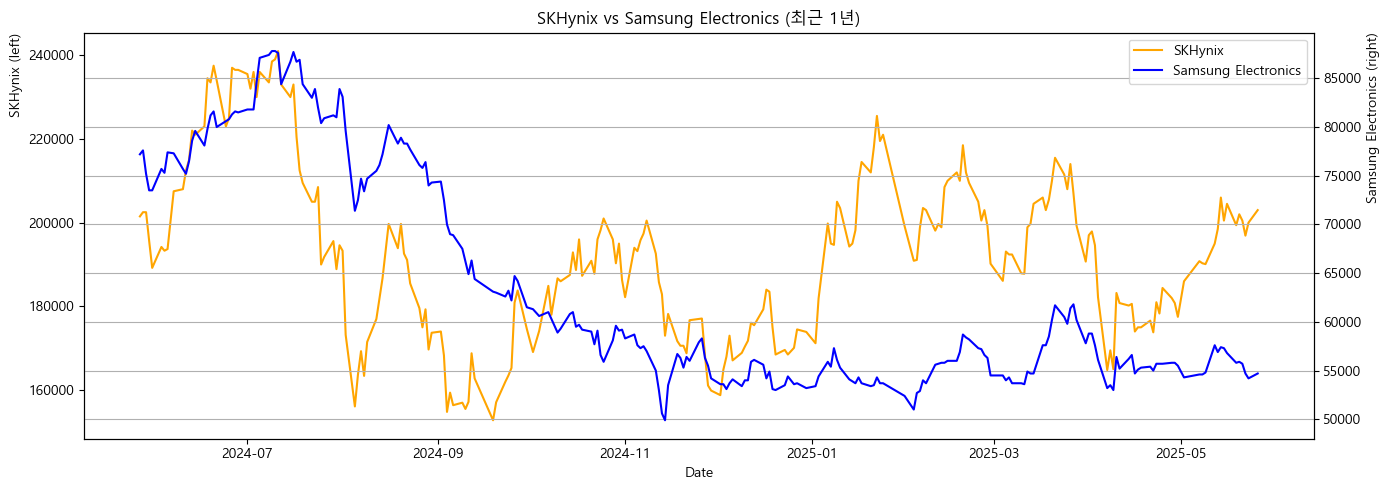

In [ ]:
# ----------------------
# 최근 1년 시각화
# ----------------------

from datetime import datetime, timedelta
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

samhi = fdr.DataReader(['005930', '000660'])

samhi_recent = samhi.loc[start_date:end_date]
print(samhi_recent)

fig, ax1 = plt.subplots(figsize=(14, 5))

ax2 = ax1.twinx()
ax2.plot(samhi_recent.index, samhi_recent['005930'], color='blue', label='Samsung Electronics')
ax2.set_ylabel('Samsung Electronics (right)', loc='top')
ax2.tick_params(axis='y')

ax1.plot(samhi_recent.index, samhi_recent['000660'], color='orange', label='SKHynix')
ax1.set_ylabel('SKHynix (left)', loc='top')
ax1.tick_params(axis='y')

ax1.set_xlabel('Date')
ax1.set_title('SKHynix vs Samsung Electronics (최근 1년)')
fig.tight_layout()

lines_1 = ax1.get_lines()
lines_2 = ax2.get_lines()
lines = lines_1 + lines_2
labels = [line.get_label() for line in lines]

plt.legend(lines, labels, loc='upper right') 
plt.grid(True)
plt.show()

In [ ]:
# ----------------------
# 최근 1년 상관관계
# ----------------------

correlation_recent = samhi_recent.corr()
correlation_recent

,005930,000660
005930,1.000000,0.420765
000660,0.420765,1.000000


- 삼성전자, 코스피 상관관계

In [ ]:
# -----------------------------
# 코스피(ks11) 데이터 불러오기
# -----------------------------

kospi = fdr.DataReader('KRX:KS11')
kospi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5914 entries, 2001-06-11 to 2025-05-26
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5914 non-null   float64
 1   High    5914 non-null   float64
 2   Low     5914 non-null   float64
 3   Close   5914 non-null   float64
 4   Volume  5914 non-null   int64  
 5   Change  5914 non-null   float64
 6   UpDown  5914 non-null   int64  
 7   Comp    5914 non-null   float64
 8   Amount  5914 non-null   int64  
 9   MarCap  5914 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 508.2 KB


In [ ]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) Close 데이터 연결
# -----------------------------
kospi_samsung = pd.concat([kospi['Close'], samsung['Close']], axis=1)
kospi_samsung.columns = ['KOSPI', 'Samsung Electronics']
kospi_samsung



,KOSPI,Samsung Electronics
Date,,
2001-06-11,608.23,NaN
2001-06-12,607.15,NaN
2001-06-13,614.05,NaN
2001-06-14,613.75,NaN
2001-06-15,618.96,NaN
...,...,...
2025-05-20,2601.80,55900.0
2025-05-21,2625.58,55700.0
2025-05-22,2593.67,54700.0


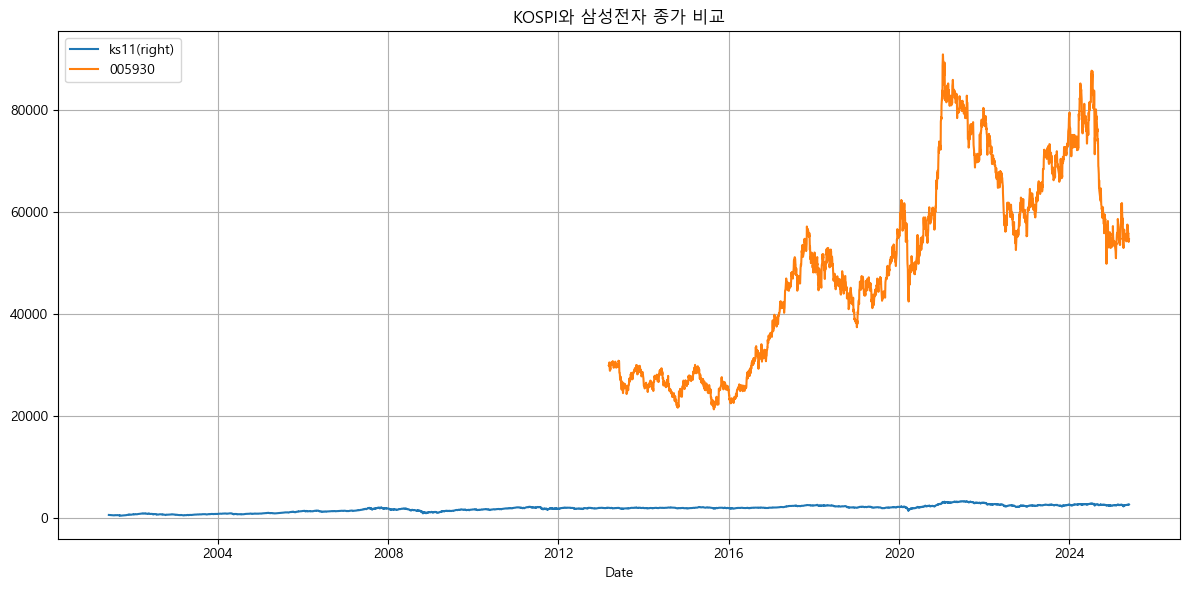

In [ ]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 전체기간 시각화
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(kospi_samsung['KOSPI'], label='ks11(right)')
plt.plot(kospi_samsung['Samsung Electronics'], label='005930')
plt.title('KOSPI와 삼성전자 종가 비교')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 전체기간 상관관계
# -----------------------------
kospi_samsung_corr = kospi_samsung.corr()
kospi_samsung_corr


,KOSPI,Samsung Electronics
KOSPI,1.000000,0.893898
Samsung Electronics,0.893898,1.000000


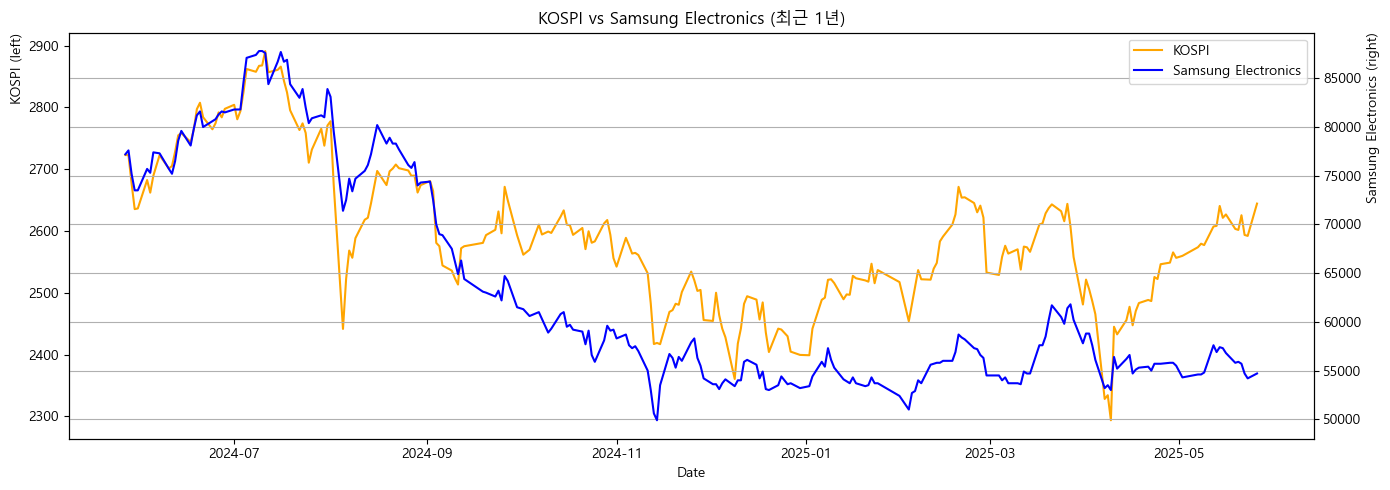

In [ ]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 최근1년 시각화
# -----------------------------
kospi_samsung_recent = kospi_samsung.loc[start_date:end_date]
fig, ax1 = plt.subplots(figsize=(14, 5))

ax2 = ax1.twinx()
ax2.plot(kospi_samsung_recent.index, kospi_samsung_recent['Samsung Electronics'], color='blue', label='Samsung Electronics')
ax2.set_ylabel('Samsung Electronics (right)', loc='top')
ax2.tick_params(axis='y')

ax1.plot(kospi_samsung_recent.index, kospi_samsung_recent['KOSPI'], color='orange', label='KOSPI')
ax1.set_ylabel('KOSPI (left)', loc='top')
ax1.tick_params(axis='y')

ax1.set_xlabel('Date')
ax1.set_title('KOSPI vs Samsung Electronics (최근 1년)')
fig.tight_layout()


lines_1 = ax1.get_lines()
lines_2 = ax2.get_lines()
lines = lines_1 + lines_2
labels = [line.get_label() for line in lines]

plt.legend(lines, labels, loc='upper right') 
plt.grid(True)

plt.show()

In [ ]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 최근1년 상관관계
# -----------------------------
kospi_samsung_recent_corr = kospi_samsung_recent.corr()
kospi_samsung_recent_corr

,KOSPI,Samsung Electronics
KOSPI,1.000000,0.854874
Samsung Electronics,0.854874,1.000000


## 이동평균
* SMA(Simple Moving Average, 단순이동평균)
    * 일정 기간동안의 가격 데이터의 평균
    * 모든 데이터포인트에 동일한 가중치 부여
    * 노이즈를 제거하고 추세를 파악하는 데 유용
    * 최신 데이터 반영이 느리다는 단점
* EMA(Exponential Moving Average, 지수이동평균)
    * 최근 데이터에 더 높은 가중치를 부여하여 계산된 이동평균
    * 최신 가격 움직임을 빠르게 반영
    * SMA보다 민감하게 반응하지만, 짧은 기간 설정 시 노이즈가 증가할 수 있음
    * 가중치 
        * $k = \frac{2}{n+1}$
        * $n$ : EMA 기간
    * EMA 업데이트
        * $EMA_{current} = (P_{current} \times k) + (EMA_{previous} \times (1-k))$
        * $P_{current}$ : 현재 가격
        * $EMA_{previous}$ : 이전 EMA 값

### SMA
* Simple Moving Average. 단순이동평균
* `컬럼.rolling(윈도우사이즈).mean()`
* 단기 이동평균 : 빠른 변동성 파악 
    * 5일 : 평일 기준 한 주 동안의 거래일수
    * 10일 
    * 20일 : 평일 기준 월간 거래일수
* 중기 이동평균 : 중기적인 가격 추세와 지지 및 저항 수준 파악 
    * 60일 : 분기(3개월) 기준
    * 100일 
* 장기 이동평균 : 장기적인 시장 흐름 이해 
    * 120일 : 반년단위 
    * 200일  : 1년단위

C:\Users\User\AppData\Local\Temp\ipykernel_6612\3124391340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_3m['SMA5'] = samsung_recent_3m['Close'].rolling(window=5).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_6612\3124391340.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_3m['SMA10'] = samsung_recent_3m['Close'].rolling(window=10).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_6612\3124391340.py:13: SettingWithCopyWarning: 
A value is trying to be set on a co

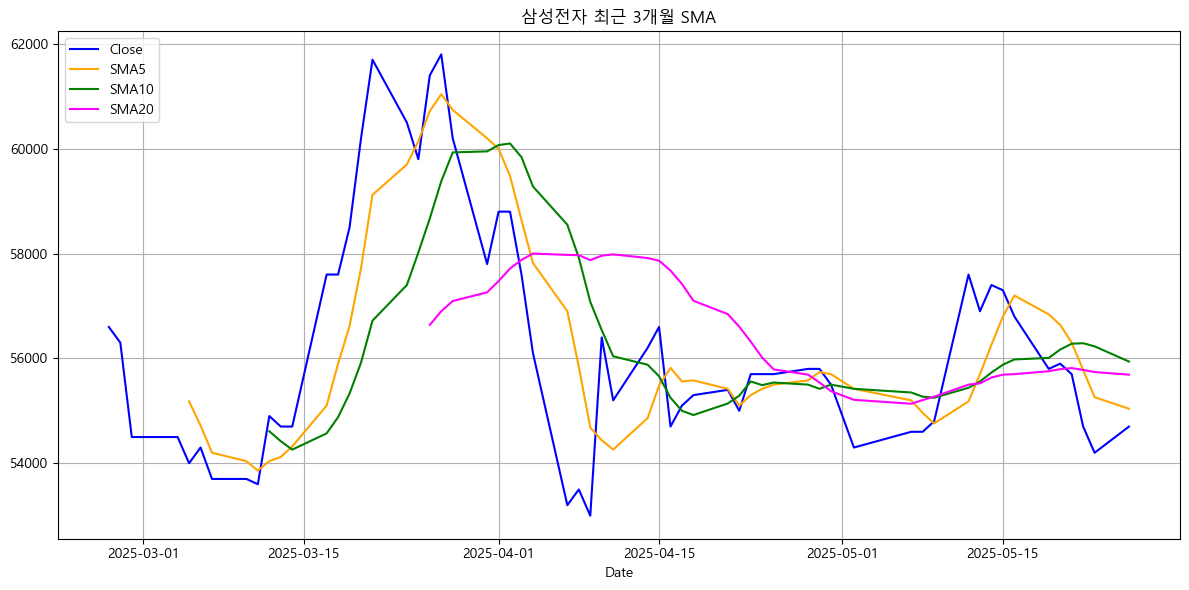

In [ ]:
# --------------------------------
# 최근 3개월 단기 SMA
# Close
# SMA5
# SMA10
# SMA20
# --------------------------------
start_date = datetime.now() - timedelta(days=90)
samsung_recent_3m = samsung.loc[start_date:end_date]
samsung_recent_3m['SMA5'] = samsung_recent_3m['Close'].rolling(window=5).mean()
samsung_recent_3m['SMA10'] = samsung_recent_3m['Close'].rolling(window=10).mean()
samsung_recent_3m['SMA20'] = samsung_recent_3m['Close'].rolling(window=20).mean()
plt.figure(figsize=(12, 6))
plt.plot(samsung_recent_3m['Close'], label='Close', color='blue')
plt.plot(samsung_recent_3m['SMA5'], label='SMA5', color='orange')
plt.plot(samsung_recent_3m['SMA10'], label='SMA10', color='green')
plt.plot(samsung_recent_3m['SMA20'], label='SMA20', color='magenta')
plt.title('삼성전자 최근 3개월 SMA')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6612\585728762.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_3m['SMA50'] = samsung_recent_3m['Close'].rolling(window=50).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_6612\585728762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_3m['SMA100'] = samsung_recent_3m['Close'].rolling(window=100).mean()


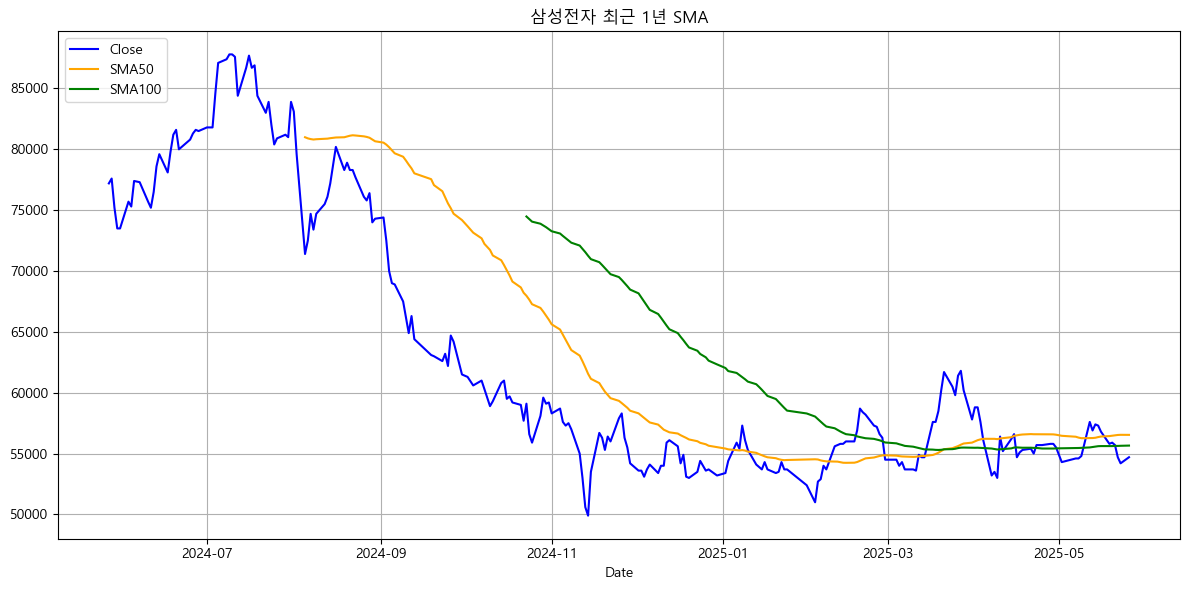

In [ ]:
# --------------------------------
# 최근 1년 중기 SMA
# Close
# Close 50일 SMA
# Close 100일 SMA
# --------------------------------
start_date = datetime.now() - timedelta(days=365)
samsung_recent_1y = samsung.loc[start_date:end_date]
samsung_recent_1y['SMA50'] = samsung_recent_1y['Close'].rolling(window=50).mean()
samsung_recent_1y['SMA100'] = samsung_recent_1y['Close'].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
plt.plot(samsung_recent_1y['Close'], label='Close', color='blue')
plt.plot(samsung_recent_1y['SMA50'], label='SMA50', color='orange')
plt.plot(samsung_recent_1y['SMA100'], label='SMA100', color='green')

plt.title('삼성전자 최근 1년 SMA')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6612\3228375961.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_3y['SMA100'] = samsung_recent_3y['Close'].rolling(window=100).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_6612\3228375961.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_3y['SMA200'] = samsung_recent_3y['Close'].rolling(window=200).mean()


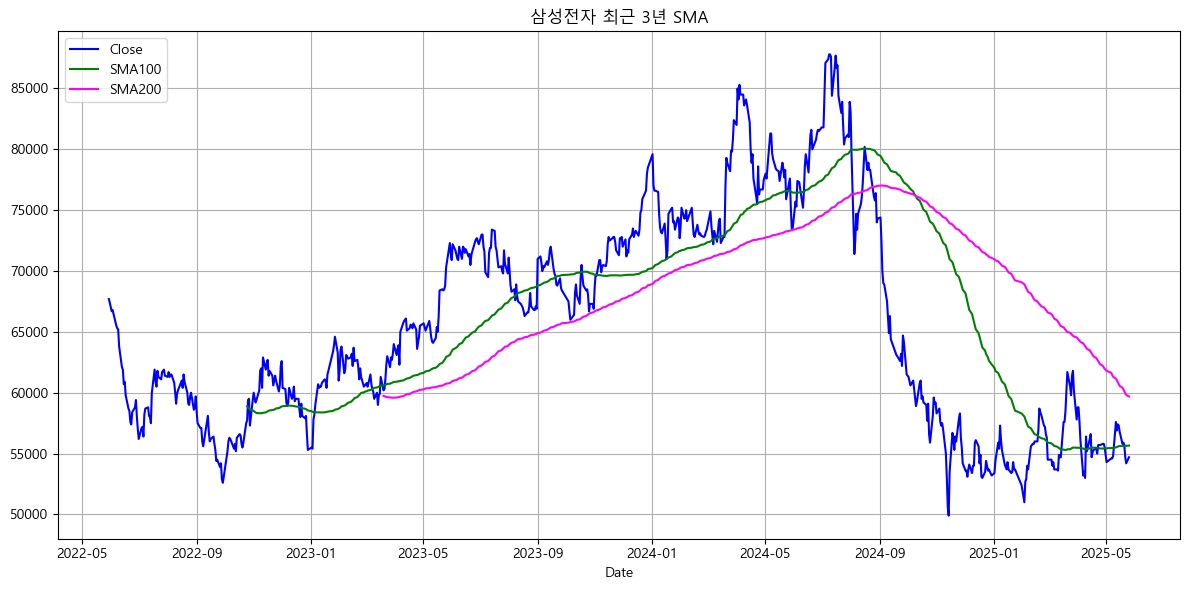

In [119]:
# --------------------------------
# 최근 3년 장기 이동평균
# Close
# Close 100일 이동평균
# Close 200일 이동평균
# --------------------------------
start_date = datetime.now() - timedelta(days=365*3)
samsung_recent_3y = samsung.loc[start_date:end_date]
samsung_recent_3y['SMA100'] = samsung_recent_3y['Close'].rolling(window=100).mean()
samsung_recent_3y['SMA200'] = samsung_recent_3y['Close'].rolling(window=200).mean()
plt.figure(figsize=(12, 6))
plt.plot(samsung_recent_3y['Close'], label='Close', color='blue')
plt.plot(samsung_recent_3y['SMA100'], label='SMA100', color='green')
plt.plot(samsung_recent_3y['SMA200'], label='SMA200', color='magenta')
plt.title('삼성전자 최근 3년 SMA')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### EMA
`컬럼.ewm(span=기간, adjust=False).mean()`

C:\Users\User\AppData\Local\Temp\ipykernel_6612\339614721.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_3m['EMA5'] = samsung_recent_3m['Close'].ewm(span=5, adjust = False).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_6612\339614721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_3m['EMA10'] = samsung_recent_3m['Close'].ewm(span=10, adjust = False).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_6612\339614721.py:12: SettingWithCopyWarning: 
A value is trying 

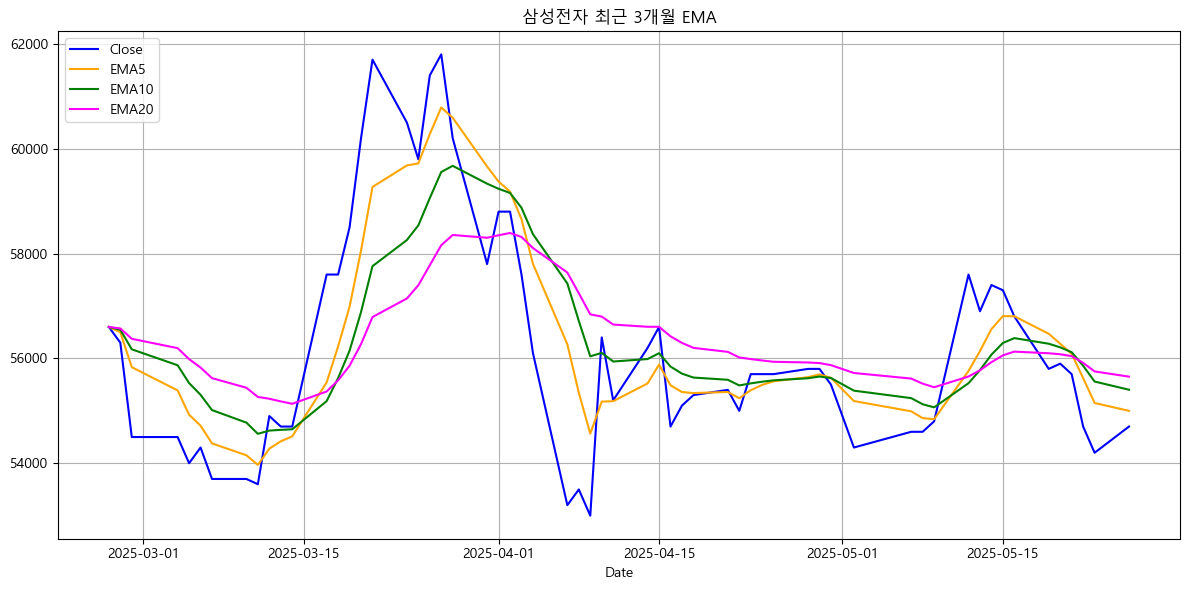

In [120]:
# --------------------------------
# 최근 3개월 단기 EMA
# Close
# Close 5일 EMA
# Close 10일 EMA
# Close 20일 EMA
# --------------------------------
start_date = datetime.now() - timedelta(days=90)
samsung_recent_3m = samsung.loc[start_date:end_date]
samsung_recent_3m['EMA5'] = samsung_recent_3m['Close'].ewm(span=5, adjust = False).mean()
samsung_recent_3m['EMA10'] = samsung_recent_3m['Close'].ewm(span=10, adjust = False).mean()
samsung_recent_3m['EMA20'] = samsung_recent_3m['Close'].ewm(span=20, adjust = False).mean()
plt.figure(figsize=(12, 6))
plt.plot(samsung_recent_3m['Close'], label='Close', color='blue')
plt.plot(samsung_recent_3m['EMA5'], label='EMA5', color='orange')
plt.plot(samsung_recent_3m['EMA10'], label='EMA10', color='green')
plt.plot(samsung_recent_3m['EMA20'], label='EMA20', color='magenta')
plt.title('삼성전자 최근 3개월 EMA')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6612\1597814343.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_1y['SMA50'] = samsung_recent_1y['Close'].rolling(window=50).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_6612\1597814343.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_1y['EMA50'] = samsung_recent_1y['Close'].ewm(span=50, adjust = False).mean()


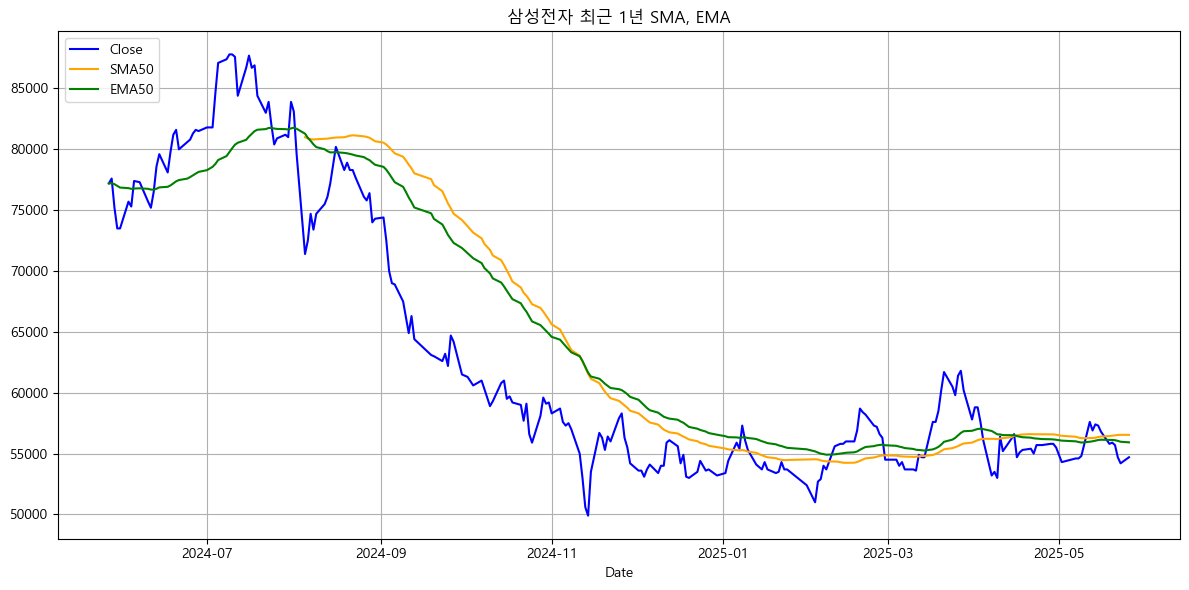

In [121]:
# --------------------------------
# 최근 1년 50일 SMA, EMA
# Close
# Close 50 SMA
# Close 50 EMA
# --------------------------------
start_date = datetime.now() - timedelta(days=365)
samsung_recent_1y = samsung.loc[start_date:end_date]
samsung_recent_1y['SMA50'] = samsung_recent_1y['Close'].rolling(window=50).mean()
samsung_recent_1y['EMA50'] = samsung_recent_1y['Close'].ewm(span=50, adjust = False).mean()
plt.figure(figsize=(12, 6))
plt.plot(samsung_recent_1y['Close'], label='Close', color='blue')
plt.plot(samsung_recent_1y['SMA50'], label='SMA50', color='orange')
plt.plot(samsung_recent_1y['EMA50'], label='EMA50', color='green')
plt.title('삼성전자 최근 1년 SMA, EMA')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## 누적평균


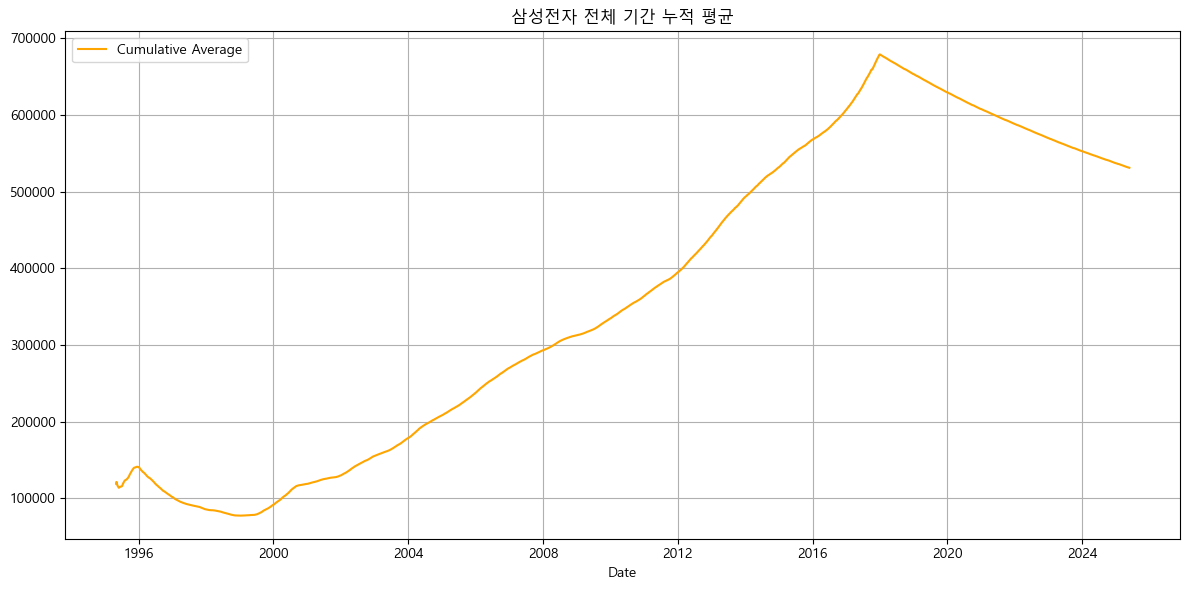

In [124]:
# -------------------
# 전체 기간 누적 평균
# -------------------

samsung['Cumulative Average'] = samsung['Close'].expanding().mean()
plt.figure(figsize=(12, 6))
plt.plot(samsung['Cumulative Average'], label='Cumulative Average', color='orange')
plt.title('삼성전자 전체 기간 누적 평균')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6612\3839955133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_1y['Cumulative Average'] = samsung_recent_1y['Close'].expanding().mean()


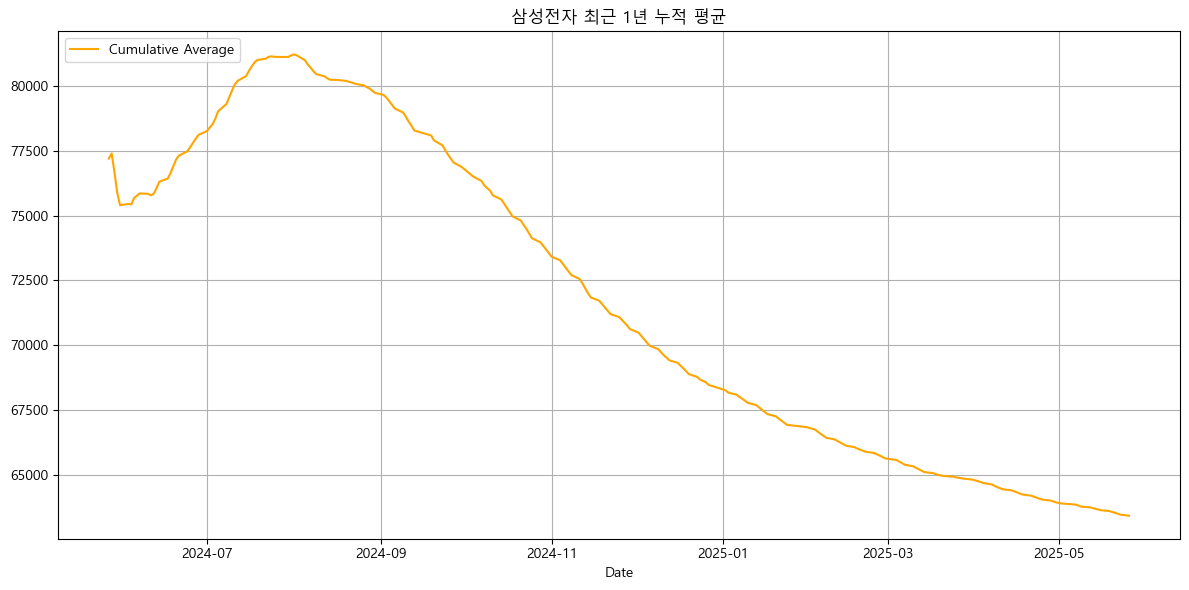

In [125]:
# -------------------
# 최근 1년 누적평균
# -------------------
start_date = datetime.now() - timedelta(days=365)
samsung_recent_1y = samsung.loc[start_date:end_date]
samsung_recent_1y['Cumulative Average'] = samsung_recent_1y['Close'].expanding().mean()
plt.figure(figsize=(12, 6))
plt.plot(samsung_recent_1y['Cumulative Average'], label='Cumulative Average', color='orange')
plt.title('삼성전자 최근 1년 누적 평균')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6612\841882014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_3m['Cumulative Average'] = samsung_recent_3m['Close'].expanding().mean()


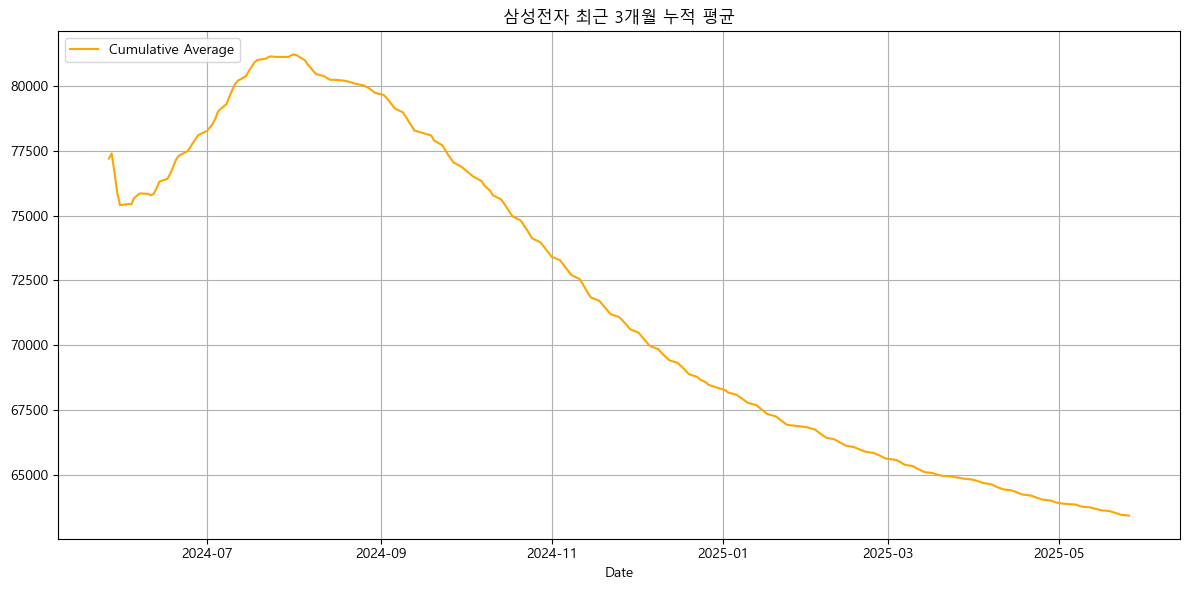

In [126]:
# -------------------
# 최근 3개월 누적평균
# -------------------

samsung_recent_3m = samsung.loc[start_date:end_date]
samsung_recent_3m['Cumulative Average'] = samsung_recent_3m['Close'].expanding().mean()
plt.figure(figsize=(12, 6))
plt.plot(samsung_recent_3m['Cumulative Average'], label='Cumulative Average', color='orange')
plt.title('삼성전자 최근 3개월 누적 평균')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## 볼린저 밴드
* 주식, 외환, 암호화폐 등의 금융시장에서 널리 사용되는 기술적 분석 도구
* 1980년대 초 존 볼린저(John Bollinger)가 개발
* 가격의 변동성을 측정하고 상대적인 고가와 저가 수준을 식별하는 데 도움을 줍니다.
* 볼린저밴드는 세 개의 선으로 구성
    * 중간밴드(Middle Band) : 일반적으로 20일 이동평균선(SMA) 사용
    * 상단밴드(Upper Band) : 중간밴드 + (20일 이동표준편차*2)
    * 하단밴드(Lower Band) : 중간밴드 - (20일 이동표준편차*2)
* 주요 특징과 용도
    * 변동성 측정 : 밴드의 폭이 넓을수록 시장 변동성이 높고, 좁을수록 변동성이 낮다.
    * 과매수/과매도 신호 : 가격이 상단 밴드에 닿으면 과매수(overbought) 상태로, 하단 밴드에 닿으면 과매도(oversold) 상태로 해석할 수 있다.
    * 추세 확인 : 강한 추세에서는 가격이 밴드 방향을 따라 지속적으로 움직인다.
    * 반전 신호 : 가격이 밴드를 벗어났다가 다시 안으로 들어오는 것은 잠재적인 반전 신호가 될 수 있다.
    

C:\Users\User\AppData\Local\Temp\ipykernel_6612\4236214919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_1y['SMA20'] = samsung_recent_1y['Close'].rolling(window=20).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_6612\4236214919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_recent_1y['Bollinger Upper'] = samsung_recent_1y['SMA20'] + 2 * samsung_recent_1y['Close'].rolling(window=20).std()
C:\Users\User\AppData\Local\Temp\ipykernel_6612\4236214919.py:3: SettingWithCopyWarn

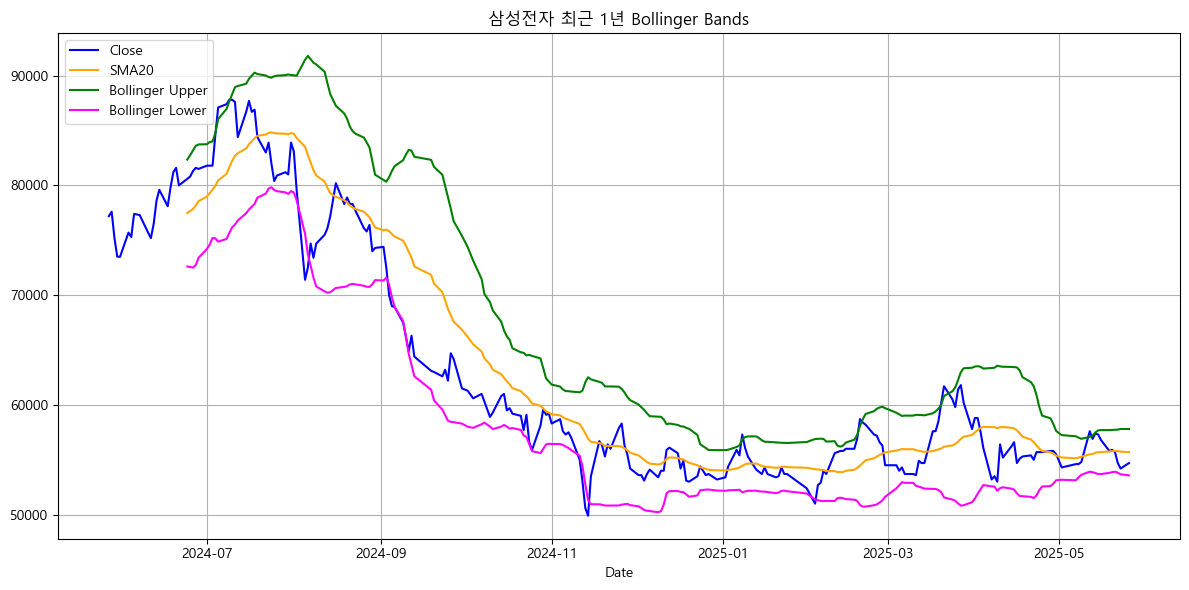

In [129]:
samsung_recent_1y['SMA20'] = samsung_recent_1y['Close'].rolling(window=20).mean()
samsung_recent_1y['Bollinger Upper'] = samsung_recent_1y['SMA20'] + 2 * samsung_recent_1y['Close'].rolling(window=20).std()
samsung_recent_1y['Bollinger Lower'] = samsung_recent_1y['SMA20'] - 2 * samsung_recent_1y['Close'].rolling(window=20).std()
plt.figure(figsize=(12, 6))
plt.plot(samsung_recent_1y['Close'], label='Close', color='blue')
plt.plot(samsung_recent_1y['SMA20'], label='SMA20', color='orange')
plt.plot(samsung_recent_1y['Bollinger Upper'], label='Bollinger Upper', color='green')
plt.plot(samsung_recent_1y['Bollinger Lower'], label='Bollinger Lower', color='magenta')
plt.title('삼성전자 최근 1년 Bollinger Bands')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()